# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply both Hierarchial and K-Means Clustering.

# Import the necessary libraries (the libraries required for performing the clustering procedures have been imported when we are answering that particular question) and load the dataset.

In [162]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [163]:
import os
os.chdir("D:\\Academic Operations\\DSBA - Python\\Online\\Data Mining\\Practice Exercise\\2")

In [164]:
df = pd.read_csv("vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# Q1. Check for missing values in the dataset.

In [165]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Q2. Drop the missing values.
### Note: [Use the dataset thus created after dropping missing values for the clustering algorithms.]

In [166]:
df = df.dropna()

In [167]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Q3. Check the shape (rows and columns), info and the basic measures of descriptive statistics from the data.

In [168]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')


The number of rows of the dataframe is 813 .
The number of columns of the dataframe is 19 .


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [170]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


# Q4. Print/Plot the dependent (categorical variable) and Check for any missing values in the data

In [171]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

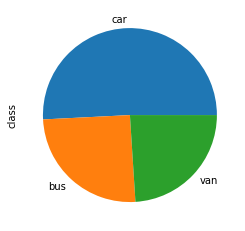

In [172]:
pd.value_counts(df["class"]).plot(kind="pie")
plt.show()

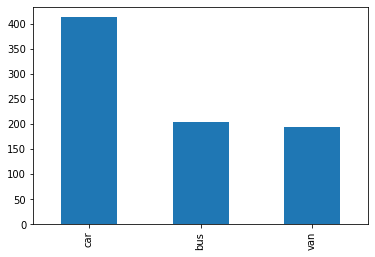

In [173]:
pd.value_counts(df["class"]).plot(kind="bar")
plt.show()

# Q4. Standardize the data.

Let us drop the categorical variable before clustering the data.

In [174]:
DF = df.drop('class', axis=1)

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
X = StandardScaler()

In [177]:
scaled_DF = X.fit_transform(DF)

In [178]:
scaled_DF

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

Now that we have scaled the data. Let us create a dataframe out of this scaled variables for clustering.

In [179]:
scaled_DF = pd.DataFrame(scaled_DF, index=DF.index, columns=DF.columns)
scaled_DF.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [180]:
#### We can also use the following code snippet scale the data. This is another method that can be tried.

print( 'from scipy.stats import zscore','\n',  
'scaled_DF = scaled_DF.apply(zscore)')

from scipy.stats import zscore 
 scaled_DF = scaled_DF.apply(zscore)


# Q5. Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.
#### Note: Please do go ahead and explore other parameters under the linkage function in the Scientific Python library. 

In [181]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [182]:
HClust = linkage(scaled_DF, method = 'ward')

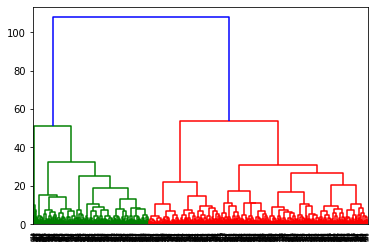

In [183]:
dend = dendrogram(HClust)

# Q6. Plot the truncated dendrogram with the last 25 clusters.

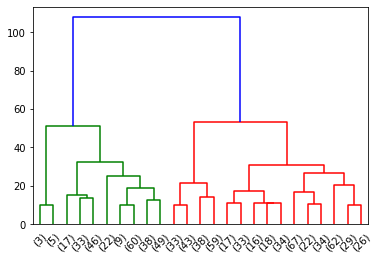

In [184]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

# Q7. Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [185]:
from scipy.cluster.hierarchy import fcluster

In [186]:
#Method 1

clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,

In [187]:
# Method 2

clusters_2 = fcluster(HClust, 60, criterion='distance')
clusters_2

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,

Now, let us go ahead and check whether the number of clusters generated by the 'maxclust' criterion is same as the number of clusters generated by the 'distance' criterion.

In [188]:
np.array_equal(clusters_1,clusters_2)

True

In [189]:
DF['H_clusters'] = clusters_1

In [190]:
DF.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,H_clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1


# Q8. Export the dataframe thus created with the clusters into a csv file.

In [191]:
df.to_csv('H_Cluster.csv')

# Q9. Perform the K-Means clustering with 2 clusters.

In [192]:
from sklearn.cluster import KMeans 

In [193]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_DF)
k_means2.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

# Q10. Find out the within cluster sum of squares for 2 clusters for the K-Means algorithm.

In [194]:
k_means2.inertia_

8623.13697598644

# Q11. Perform the K-Means clustering with 3 clusters and find out the within cluster sum of squares.

In [195]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_DF)
k_means3.inertia_

7037.467394618071

# Q13. Find the Within Sum of Squares (WSS) for 2 to 15 clusters.

In [196]:
wss =[] 

In [197]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_DF)
    wss.append(KM.inertia_)

In [198]:
wss

[14634.0,
 8623.13697598644,
 7037.287609421165,
 5739.201326916508,
 5185.908467614206,
 4705.949959463537,
 4350.68641994442,
 4084.2769100685123,
 3868.10634005062,
 3652.152521080119,
 3465.5813536796823,
 3332.688558211551,
 3213.815204419259,
 3109.740439131258]

# Q14. Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' computed in the last question.

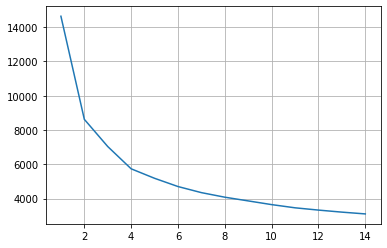

In [200]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

# Q15. Find the optimum number of clusters from the WSS plot in the previous question.

Firstly, we will check with 2 clusters.

In [203]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_DF)
labels = k_means.labels_
labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

Now, let us check with 4 clusters.

In [205]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_DF)
labels_4 = k_means4.labels_
labels_4

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 0,
       1, 3, 0, 0, 3, 1, 1, 1, 0, 1, 3, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 3,
       3, 1, 3, 1, 0, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3, 3, 1, 3, 0, 1, 0, 0,
       1, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 1, 3, 0,
       3, 3, 0, 3, 2, 1, 1, 3, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 1, 0, 0, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 3, 0, 2, 3, 1, 3, 1, 1, 0,
       3, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 3, 0, 1, 1, 0, 0,
       1, 0, 3, 3, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1, 1,
       0, 3, 3, 0, 3, 1, 0, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3, 0, 1, 3, 1,
       0, 3, 1, 1, 3, 0, 3, 3, 1, 1, 0, 3, 0, 3, 1, 1, 0, 1, 1, 0, 0, 3,
       1, 1, 1, 0, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 0, 1, 1, 3, 3, 0, 3,
       1, 0, 3, 1, 2, 1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       0, 3, 1, 0, 3, 3, 3, 1, 3, 0, 0, 3, 0, 1, 3,

# Q16. Check the average silhouette score and silhouette width of the cluster(s) thus created.

In [206]:
DF_Kmeans = DF.drop('H_clusters',axis=1)

In [207]:
from sklearn.metrics import silhouette_samples, silhouette_score

Let us check the silhouette score and silhouette width for 2 clusters.

In [208]:
silhouette_score(DF_Kmeans,labels)

0.6546894304631842

In [209]:
silhouette_samples(DF_Kmeans,labels).min()

-0.566686232533157

Let us check the silhouette score and silhouette width for 2 clusters.

In [210]:
silhouette_score(DF_Kmeans,labels_4)

0.28723065948692916

In [211]:
silhouette_samples(DF_Kmeans,labels_4).min()

-0.38349422184821896

# Q17. Add the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

Here, we will be going with 2 clusters from the K-Means Clustering as well. This is based on the Silhouette Score and Silhouette width.

In [213]:
DF['Kmeans_clusters'] = labels

In [214]:
DF.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,H_clusters,Kmeans_clusters
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1,1


# Q18. Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv.

In [215]:
DF.to_csv('Cluster.csv')

Here, we see that the silhouette score of some clusters are coming out to be negative. But we are keeping it that way. We can probably go ahead and try to read into the significance of the clusters.
We can try other methods of scaling and check whether the answers are coming out to be different or not. We can also try to use different linkage methods and check.
Since Clustering is an Unsupervised Learning Technique, we can dig deep and spend some time on imputing the missing values rather than dropping them. We can try to perform measures of Exploratory Data Analysis to understand the data better and then perform the Clustering algorithm.